
# ***`Bot Tokinho`***
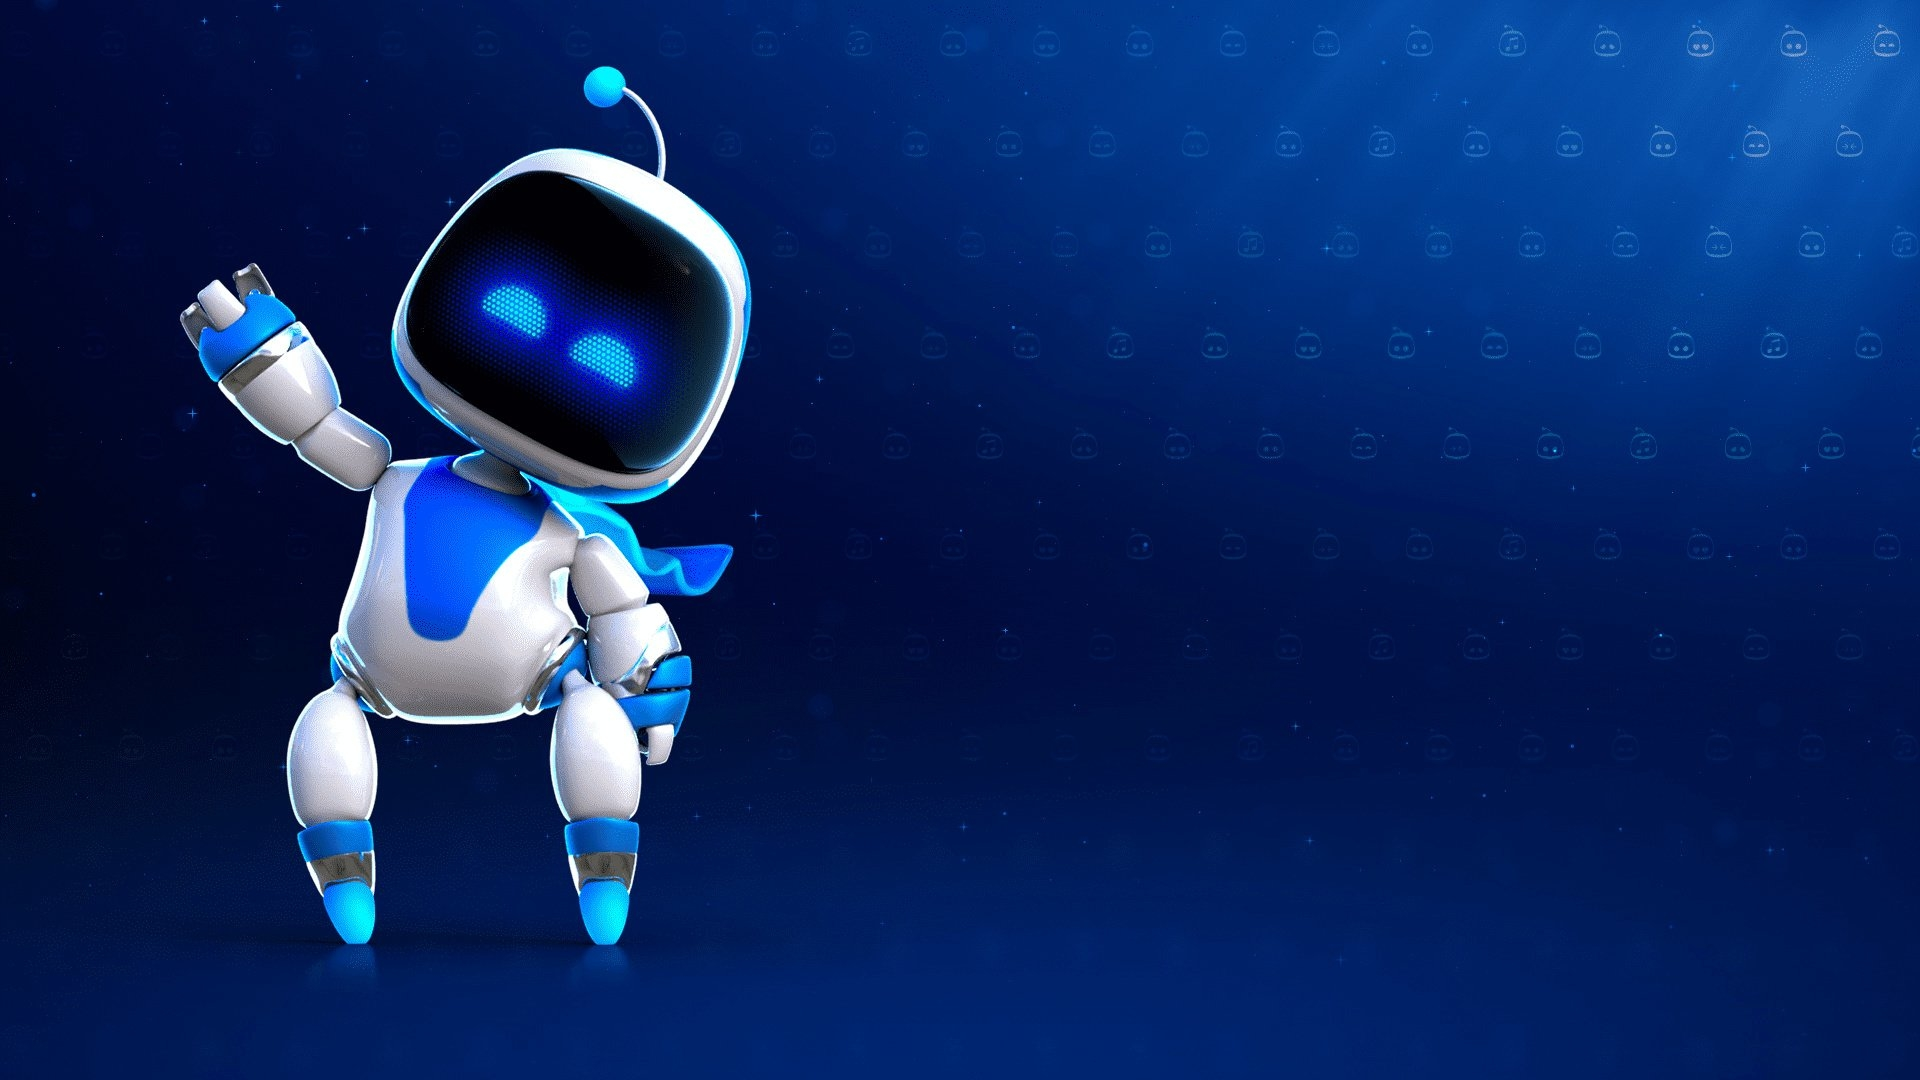






# ***`Instalações`***

In [ ]:
pip install pytelegrambotapi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.9/219.9 KB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pytelegrambotapi: filename=pyTelegramBotAPI-4.9.0-py3-none-any.whl size=203107 sha256=3a894e4824bf09dbc52a5b88ad74a64753e346e22353f451f8538f87d588fe69
  Stored in directory: /root/.cache/pip/wheels/95/a7/fd/f667b71e29e3f64f239f30195efc39de642e72f8a47a6fcd8d
Successfully built pytelegrambotapi


In [ ]:
import telebot
import pandas as pd
import requests
from bs4 import BeautifulSoup
from datetime import datetime
from datetime import date

# BOT
CHAVE_API = 'Your api code bot here'

# CSV LOTOFACIL
URL = 'the path of the excel'

df = pd.read_excel(URL)

# Convertendo de object para DateTime
df['Data'] = pd.to_datetime(df['Data'])

# WEB SCRAPING
url_web = 'https://www.estadao.com.br/loterias/lotofacil/'

page = requests.get(url_web)
print(page)


<Response [200]>


# ***`Trab`***

In [ ]:
bot = telebot.TeleBot(CHAVE_API)

soup = BeautifulSoup(page.text, 'html.parser')

h2_list = []

#----------------------------------MAIN TEXT------------------------------------
texto = """
Escolha uma opção (Clique no item):

/opcao1 Jogo do dia

/opcao2 Escolher uma data para pegar os números

/opcao3 Conferir resultado do ultimo sorteio

/opcao4 Conferir resultado de um concurso em especifico
"""

#----------------------VENDO SE TERMINA EM 0------------------------------------

# Pegando o h2 específico que está dentro de uma div com classe
for search in soup.find_all('div', {'class' : 'header-informs-loteria'}):
    h2_list.extend(search.find_all('h2'))

# Pegando só a parte textual(oq está dentro realmente dos >   <)
list_data = list(h2_list[0].get_text())

# Variável do tipo string para receber o resultado
numero = ''

# Pegando sómente os números dentro do texto
for c in range(21,25):
    numero = numero + list_data[c]

fim0 = False

# Conferindo se termina em 0, em caso positivo deixando o combo true
if (numero[3] == '9'):
    fim0 = True


#--------------------------ULTIMA DATA DO SORTEIO-------------------------------
soup = BeautifulSoup(page.text, 'html.parser')

h2_list = []

# Pegando o bloco especifico h2 que está dentro de uma div com classe
for ul in soup.find_all('div', {'class' : 'header-informs-loteria'}):
    h2_list.extend(ul.find_all('h2'))

# Pegando só a parte textual(oq está dentro realmente dos >   <)
list_data = list(h2_list[0].get_text())

# Variável do tipo string para receber o resultado
ultima_data = ''

# Pegando sómente as datas dentro do texto
for c in range(27,37):
    ultima_data = ultima_data + list_data[c]

# convertendo a string em tipo date time
ultima_data = datetime.strptime(ultima_data, '%d/%m/%Y').date()

#----------------------------DIA E MES ATUAL------------------------------------
data_atual = date.today()

mes_atual = data_atual.month

dia_atual = data_atual.day

#-------------------------------------------------------------------------------

@bot.message_handler(commands=['opcao1'])
def opcao1(mensagem):
    try:
        # Criando 1 novo DF só com os resultados correspondentes ao mes e dia
        filtro = df[(df['Data'].dt.month == mes_atual) & (df['Data'].dt.day == dia_atual)]

        lista = []

        for c in range(15):
            
            # Lista dos que mais sairam por bola
            cobaia = filtro['bola '+ str((c+1))].value_counts().index.tolist()

            # Pega só o primeiro (o maior) de cada bola
            lista.append(cobaia[0])

            if (c != 0):
                if (lista[c] == lista[c - 1]):
                    lista[c] = cobaia[1]

            # Deixando em ordem crescente
            lista.sort()
        # Aviso caso seja concurso especial
        if (fim0):
            bot.send_message(mensagem.chat.id,"HOJE O CONCURSO SERÁ COM FIM 0! NÃO ESQUEÇA DE APOSTAR!")

        bot.send_message(mensagem.chat.id,"Números que mais sairam nessa mesma data no passado: \n\n" + str(lista) + "\n\nBoa sorte!")
    except Exception as e:
        bot.send_message(mensagem.chat.id,f'Ocorreu o seguinte erro: {e}\nPor favor tente novamente')

#-------------------------------------------------------------------------------

@bot.message_handler(commands=['opcao2'])
def opcao2(mensagem):
    try:
        msg = bot.send_message(mensagem.chat.id,"Digite o dia e o mes:")
        bot.register_next_step_handler(msg , data)
    except Exception as e:
         bot.send_message(mensagem.chat.id,f'Ocorreu o seguinte erro: {e}\nPor favor tente novamente')
         bot.send_message(mensagem.chat.id, texto)

def data(mensagem):
    try:
        data = mensagem.text
        dia = data[0] + data[1]
        mes = data[3] + data[4]

        # Criando 1 novo DF só com os resultados correspondentes ao mes e dia
        filtro = df[(df['Data'].dt.month == int(mes)) & (df['Data'].dt.day == int(dia))]

        lista = []

        for c in range(15):
            
            # Lista dos que mais sairam por bola
            cobaia = filtro['bola '+ str((c+1))].value_counts().index.tolist()

            # Pega só o primeiro (o maior) de cada bola
            lista.append(cobaia[0])

            if (c != 0):
                if (lista[c] == lista[c - 1]):
                    lista[c] = cobaia[1]

            #Deixando em ordem crescente
            lista.sort()

        
        #Output
        bot.send_message(mensagem.chat.id,"Números que mais sairam nessa mesma data no passado: \n\n" + str(lista))
    except Exception as e:
         bot.send_message(mensagem.chat.id,f'Ocorreu o seguinte erro: {e}\nPor favor tente novamente')
         bot.send_message(mensagem.chat.id, texto)
#-------------------------------------------------------------------------------

@bot.message_handler(commands=['opcao3'])

def opcao3(mensagem):
    try:
        soup = BeautifulSoup(page.text, 'html.parser')

        span_list = []

        for ul in soup.find_all('div', {'class' : 'numeros-sorteados'}):
            span_list.extend(ul.find_all('span'))

        sorteados = []

        contador = 0

        for c in range(15):
            # Pegando só o texto das classes e convertendo para inteiro
            sorteados.append(int(span_list[c].get_text()))

        # Criando 1 novo DF só com os resultados correspondentes ao mes e dia
        filtro = df[(df['Data'].dt.month == int(mes_atual)) & (df['Data'].dt.day == int(dia_atual -1))]

        lista = []
        

        for c in range(15):
            
            # Lista dos que mais sairam por bola
            cobaia = filtro['bola '+ str((c+1))].value_counts().index.tolist()

            # Pega só o primeiro (o maior) de cada bola
            lista.append(cobaia[0])

            if (c != 0):
                if (lista[c] == lista[c - 1]):
                    lista[c] = cobaia[1]

        for c in sorteados:
            for d in lista:
                if c == d:
                    contador += 1

        bot.send_message(mensagem.chat.id,f'Sorteio número {numero} realizado em {ultima_data.day} do {ultima_data.month}')
        bot.send_message(mensagem.chat.id,f'Você acertou {contador} números dos sorteados!')
    except Exception as e:
         bot.send_message(mensagem.chat.id,f'Ocorreu o seguinte erro: {e}\nPor favor tente novamente')
         bot.send_message(mensagem.chat.id, texto)

#-------------------------------------------------------------------------------

@bot.message_handler(commands=['opcao4'])

def opcao4(mensagem):
    try:
        msg = bot.send_message(mensagem.chat.id,"Digite o número do concurso que deseja ver o resultado:")
        bot.register_next_step_handler(msg , consulta)
    except Exception as e:
         bot.send_message(mensagem.chat.id,f'Ocorreu o seguinte erro: {e}\nPor favor tente novamente')
         bot.send_message(mensagem.chat.id, texto)

def consulta(mensagem):
    try:
        bot.send_message(mensagem.chat.id,"Coletando informações da web...")
        n_consulta = mensagem.text
        #Mudando a url para filtrar relacionado ao numero do sorteio  
        new_url = 'https://www.estadao.com.br/loterias/lotofacil/' + n_consulta
        new_page = requests.get(new_url)

        soup = BeautifulSoup(new_page.text, 'html.parser')

        span_list = []

        #Pegando os números sorteados da nova pagina 
        for div in soup.find_all('div', {'class' : 'numeros-sorteados'}):
            span_list.extend(div.find_all('span'))

        sorteados = []

        contador = 0 

        for c in range(15):
            # Pegando só o texto das classes e convertendo para inteiro
            sorteados.append(int(span_list[c].get_text()))

        #--------------------Números sorteados pego---------------------------------

        h2_list = []
    
        # Pegando o bloco especifico h2 que está dentro de uma div com classe
        for div in soup.find_all('div', {'class' : 'header-informs-loteria'}):
            h2_list.extend(div.find_all('h2'))
    
        # Pegando só a parte textual(oq está dentro realmente dos >   <)
        list_data = list(h2_list[0].get_text())
    
        # Variável do tipo string para receber o resultado
        filter_data = ''
    
        # Pegando somente as datas dentro do texto
        for c in range(27,37):
            filter_data = filter_data + list_data[c]

        # convertendo a string em tipo date time
        filter_data = datetime.strptime(filter_data, '%d/%m/%Y').date()
        
        bot.send_message(mensagem.chat.id,f'Sorteio número {n_consulta} realizado no dia {filter_data.day} do {filter_data.month} de {filter_data.year}')
        bot.send_message(mensagem.chat.id,f'Os números sorteados nesse dia foram:\n\n {sorteados}')
    except Exception as e:
         bot.send_message(mensagem.chat.id,f'Ocorreu o seguinte erro: {e}\nPor favor tente novamente')
         bot.send_message(mensagem.chat.id, texto)

@bot.message_handler(commands=['stop'])

def stop(mensagem):
    bot.send_message(mensagem.chat.id,f' Desligado')
    Vai_Crasha_Pq_Não_Sei_O_Comando_De_Parar


def verificar(mensagem):
    return True

@bot.message_handler(func=verificar)

def responder(mensagem):
    try:
        bot.send_message(mensagem.chat.id, texto)
    except Exception as e:
         bot.send_message(mensagem.chat.id,f'Ocorreu o seguinte erro: {e}\nPor favor tente novamente')
         bot.send_message(mensagem.chat.id, texto)

bot.polling()